Корпус - 30 учебных текстов русского языка уровней А2, B1 и B2. Текстометром проверялся уровень каждого текста.

Источники текстов:
1. Тесты по русскому языку как иностранному. Базовый сертификационный уровень. Общее владение. Екатеринбург: Изд-во Уральского гос. ун-та им. А. М. Горького, 2007.
2. Андрюшина Н. П., Макова М. Н., Пращук Н. И. Тренировочные тесты по русскому языку как иностранному. I сертификационный уровень. М., 2004.
3. Климкович О. А. РУССКИЙ ЯЗЫК: ТЕКСТЫ ДЛЯ ЧТЕНИЯ И ОБСУЖДЕНИЯ. Методические рекомендации. ЧАСТЬ 1. ВГУ имени П.М. Машерова, 2013.
4. Вардзелашвили Ж. ТЕКСТЫ ДЛЯ ЧТЕНИЯ по русскому языку (РКИ, УРОВЕНЬ В2).
5. Сертификационное тестирование ГИРЯ им. А. С. Пушкина. ОБРАЗЦЫ ТЕСТОВЫХ БЛОКОВ ПО УРОВНЯМ. Русский язык: повседневное общение для взрослых. Чтение. A2-B2.

In [144]:
#из текстовых файлов подгрузим три подкорпуса по уровням, три списка строк
with open ('a2.txt', 'r', encoding = 'UTF-8') as file: #открываем файл на чтение
    a2 = file.read().split('*') #делим строку на тексты по заданному в файле разделителю - астериску
    file.close #закрываем файл
with open ('b1.txt', 'r', encoding = 'UTF-8') as file:
    b1 = file.read().split('*')
    file.close
with open ('b2.txt', 'r', encoding = 'UTF-8') as file:
    b2 = file.read().split('*')
    file.close

corpus = [] #для очистки и парсинга создадим список списков строк, длина = 3 элемента
corpus.append(a2)
corpus.append(b1)
corpus.append(b2)

In [145]:
import re
import spacy
import seaborn as sns

In [146]:
#очистка для подсчета данных по предложениям
sentences = []
for pc in corpus:
    pc_sent = []
    for text in pc:
        text = text.replace('\n', ' ').lower() #заменяем абзацы на пробелы
        text = re.sub('\s+', ' ', text) #убираем повторяющиеся пробелы
        text = re.sub('^( )', '', text) #убираем начальный пробел
        text = re.sub('( )$', '', text) #и конечный (нужно для верного подсчета количества слов)
        pc_sent.append(re.sub('\s+', ' ', re.sub('[^а-яё .!?]', '', text))) #сохраним здесь вариант с разделителями предложений, удалим лишние пробелы
    sentences.append(pc_sent)

In [147]:
#очистка дальше и токенизация
clcorpus = []
tkcorpus = []
for pc in corpus:
    cleanedpc = []
    tkpc = []
    for text in pc:
        text = text.replace('\n', ' ').lower() #заменяем абзацы на пробелы
        text = re.sub('\s+', ' ', text) #убираем повторяющиеся пробелы
        text = re.sub('[^а-яё ]', '', text) #удаляем все небуквенные символы 
        text = re.sub('\s+', ' ', text)
        text = re.sub('^( )', '', text) #убираем начальный пробел
        text = re.sub('( )$', '', text)
        cleanedpc.append(text)
        tkpc.append(re.split(r'[ ]', text))
    clcorpus.append(cleanedpc) #список списков строк кириллического текста
    tkcorpus.append(tkpc) #список списков списков токенов

In [148]:
#удаляем стоп-слова
nlp = spacy.load('ru_core_news_sm') #подгружаем модель для русского языка
tokenizedcorpus = []
for pc in tkcorpus:
    pctk = []
    for x in range(len(pc)):
        txtk = [word for word in pc[x] if not word in nlp.Defaults.stop_words]
        pctk.append(txtk)
    tokenizedcorpus.append(pctk) #список списков списков токенизированных слов после удаления стоп-слов

In [317]:
import pandas as pd 
table = pd.DataFrame({ #создаем датасет с одним столбцом с названиями текстов
    "Text name": ['Balerina', 'Pavel', 'Kazachenko', 'Babushka', 'Nina', 'Dal', 'Natasha', 'Kniga', 'Sakhar', 'Vrach',
                 'Kefir', 'Vitruvius', 'Volga', 'Ona', 'List', 'Schweizer', 'Guido', 'Universum', 'Priyut', 'Mirikin',
                 'Depo', 'Vospitannost', 'Tseli', 'Trend', 'Sovet', 'Pravila', 'Intelligentnost', 'Muzhestvo', 'Religia', 'Online pokupki'],
    "Level": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
})

In [318]:
lengths = []
for pc in tokenizedcorpus:
    for text in pc: #для каждого элемента списка, токенизированного текста, считаем его длину и сохраняем в переменную
        lengths.append(len(text))
table["Words"] = lengths #добавляем столбец с длинами текстов без стоп-слов

In [319]:
avrglengths = []
for pc in tkcorpus:
    for text in pc:
        charcounter = 0
        for word in text:
            charcounter += len(word)
        avrglengths.append(round(charcounter/len(text), 2))    
table["Length of word"] = avrglengths

In [320]:
sentcount = []
wordcount = []
for pc in sentences:
    for text in pc:
        sentcount.append(len(re.findall(r'([\.?!])', text))) #считаем количество разделителей предложений в тексте
for pc in tkcorpus:
    for text in pc:
        wordcount.append(len(text))
count = []
for i in range(len(wordcount)):
    count.append(round(wordcount[i] / sentcount[i], 2))
table["Length of sentence"] = count

In [321]:
#доля существительных в тексте, т. е. количество существительных/wordcount
nouns = []
nounrate = []
for pc in clcorpus:
    for text in pc:
        sum = 0
        for token in nlp(text):
            if token.pos_ == 'NOUN':
                sum += 1
        nouns.append(sum)
for i in range(len(nouns)):
    nounrate.append(round(nouns[i] / wordcount[i], 2))
table["Noun %"] = nounrate

In [322]:
#доля прилагательных
adj = []
adjrate = []
for pc in clcorpus:
    for text in pc:
        sum = 0
        for token in nlp(text):
            if token.pos_ == 'ADJ':
                sum += 1
        adj.append(sum)
for i in range(len(adj)):
    adjrate.append(round(adj[i] / wordcount[i], 2))
table["ADJ %"] = adjrate

In [323]:
#количество сентенциальных определений
acl = []
for pc in clcorpus:
    for text in pc:
        sum = 0
        for token in nlp(text):
            if token.dep_ == 'acl':
                sum += 1
        acl.append(sum)
table["Acl"] = acl

In [324]:
#количество глаголов на предложение
verbrate = []
verb = []
for pc in clcorpus:
    for text in pc:
        sum = 0
        for token in nlp(text):
            if token.pos_ == 'VERB':
                sum += 1
        verb.append(sum)
for i in range(len(verb)):
    verbrate.append(round(verb[i] / sentcount[i], 2))
table['Verb per sentence'] = verbrate

In [325]:
#количество сентенциальных подлежащих (вершина группы - инфинитив)
csubj = []
for pc in clcorpus:
    for text in pc:
        sum = 0
        for token in nlp(text):
            if token.dep_ == 'csubj':
                sum += 1
        csubj.append(sum)
table["Clausal subj"] = csubj

In [326]:
print(table)

          Text name  Level  Words  Length of word  Length of sentence  Noun %  \
0          Balerina      1    120            5.24                9.33    0.25   
1             Pavel      1     64            4.86                5.63    0.16   
2        Kazachenko      1    115            4.84                4.25    0.23   
3          Babushka      1    390            4.49                7.56    0.19   
4              Nina      1    258            4.64                7.06    0.19   
5               Dal      1    245            5.39                9.32    0.33   
6           Natasha      1    257            5.00                7.81    0.27   
7             Kniga      1    237            4.48                8.93    0.28   
8            Sakhar      1    246            4.60                9.15    0.31   
9             Vrach      1    155            5.27                9.42    0.33   
10            Kefir      2    241            5.33                8.66    0.28   
11        Vitruvius      2  

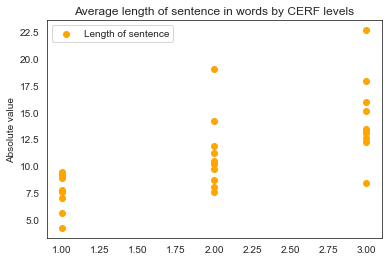

In [335]:
#визуализируем распределение, похожее на неслучайное - удлинение предложений с ростом уровня учебного текста

import matplotlib.pyplot as plt
 
x2 = table["Level"]
y2 = table["Length of sentence"]
plt.scatter(x2, y2, label = "Length of sentence", color = 'orange')

plt.ylabel('Absolute value')
plt.title('Average length of sentence in words by CERF levels')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Length of sentence'}, xlabel='Level'>

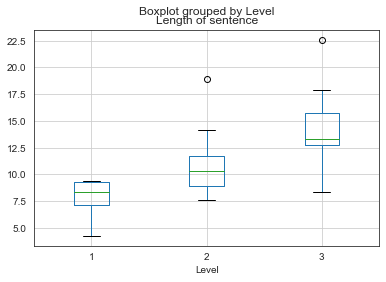

In [328]:
table.boxplot(column = "Length of sentence", by = "Level") #то же самое, оба красивые

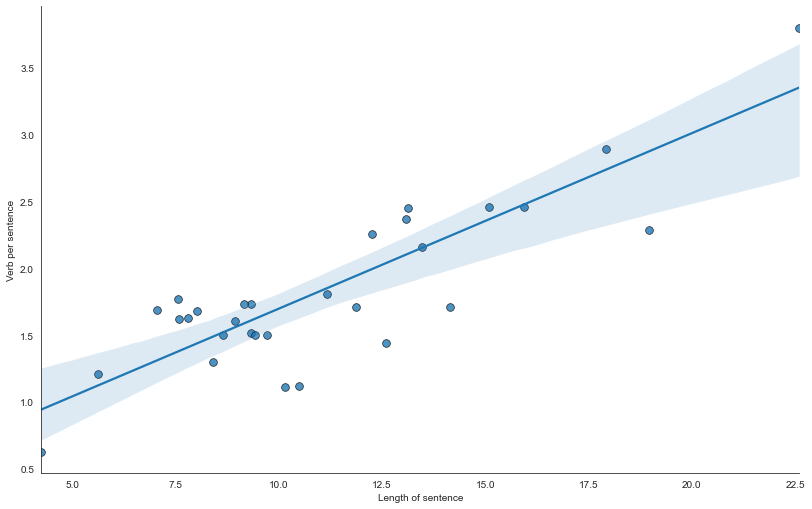

In [329]:
#другое распределение, похожее на корреляцию - чем больше в предложении предикаций, тем оно длиннее
sns.set_style("white")
gridobj = sns.lmplot(x="Length of sentence", y="Verb per sentence", data=table, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

In [330]:
correlation_df = table.corr()
correlation_df

,Level,Words,Length of word,Length of sentence,Noun %,ADJ %,Acl,Verb per sentence,Clausal subj
Level,1.000000,-0.033257,0.396757,0.674278,0.065773,0.317299,0.538615,0.580224,0.201111
Words,-0.033257,1.000000,-0.070382,0.139416,0.091272,-0.272860,0.514658,0.264266,0.173804
Length of word,0.396757,-0.070382,1.000000,0.342934,0.725207,0.698217,0.150234,-0.016016,-0.059238
Length of sentence,0.674278,0.139416,0.342934,1.000000,0.178324,0.148266,0.612478,0.852512,0.310344
Noun %,0.065773,0.091272,0.725207,0.178324,1.000000,0.428180,-0.040839,-0.196695,-0.123302
ADJ %,0.317299,-0.272860,0.698217,0.148266,0.428180,1.000000,-0.115728,-0.255097,-0.247045
Acl,0.538615,0.514658,0.150234,0.612478,-0.040839,-0.115728,1.000000,0.689742,0.438014
Verb per sentence,0.580224,0.264266,-0.016016,0.852512,-0.196695,-0.255097,0.689742,1.000000,0.456177
Clausal subj,0.201111,0.173804,-0.059238,0.310344,-0.123302,-0.247045,0.438014,0.456177,1.000000


<AxesSubplot:>

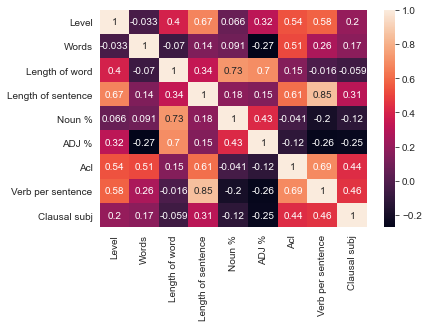

In [331]:
sns.heatmap(correlation_df, annot=True)

Сильная положительная корреляция (0,85) обнаруживается между параметрами длины предложения и количества в нем глагольных форм.
Достаточно сильна положительная корреляция между количеством сентенциальных определений в тексте и количеством глагольных форм на предложение (0,69), что легко объяснить обязательным наличием в определительной зависимой предикации финитной формы. Между двумя именными наблюдениями есть сильная положительная корреляция (0,73) - долей существительных и длиной слова в символах; чем длиннее слово, тем более вероятно, что его часть речи существительное, если слово - имя, то есть большая вероятность, что оно окажется длиннее, чем леммы других частей речи.
Отсутствие положительной корреляции и даже наличие слабой отрицательной корреляции между количеством слов в учебном тексте и высотой его уровня свидетельствует о равномерном распределении длин текстов внутри подкорпусов, так, есть основание доверять полученным статистическим данным.